<a href="https://colab.research.google.com/github/ajanaferreira/bootcampdataanalytics/blob/main/Desafio_Individual_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizando as importações necessárias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy import stats
from scipy.stats import geom

In [ ]:
# Lendo o arquivo.
df = pd.read_csv('populacao_brasileira..csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
# Verificando as informações do arquivo.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


###1. Considere pessoas fluentes em inglês, qual a probabilidade complementar?

In [ ]:
#quantidade de pessoas no total
pop_total = len(df)
#quantidade de pessoas no nível avançado
pop_fluente = len(df[df['nível de proficiência em inglês'] == 'Avançado'])
#quantidade de pessoas não fluentes
pop_nao_fluente = pop_total - pop_fluente
#probabilidade complementar
prob_complementar = pop_nao_fluente / pop_total
print(f'A probabilidade complementar é de {prob_complementar:.2%}')

A probabilidade complementar é de 65.60%


###2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [ ]:
#Filtrando somente as pessoas de Alagoas e Pará.
df_estado = df[df['estado'].isin(['AL', 'PA'])]
#Calculando o total de renda por estado e renda maior que 5000
total_estado = len(df_estado)
renda_maior = len(df_estado[df_estado['renda'] > 5000])
#Calculando a probabilidade
prop_renda = renda_maior / total_estado
print(f'A probabilidade de renda maior que 5000 é de {prop_renda:.2%}')

A probabilidade de renda maior que 5000 é de 5.06%


###3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
print(stats.__version__)

1.13.1


In [ ]:
df_amazonas = df[df['estado'] == 'AM']
total_amazonas = len(df_amazonas)
am_superior = len(df_amazonas[df_amazonas['escolaridade'].isin(['Superior', 'Pós-graduação'])])
prop_superior = am_superior / total_amazonas
p = prop_superior
probabilidade = stats.geom.pmf(k=5, p=p)
print(f'A probabilidade de ter ensino superior completo no Amazonas é de {probabilidade:.2%}')

A probabilidade de ter ensino superior completo no Amazonas é de 2.21%


###4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [ ]:
#Verificando qual é o valor máximo para inserir na faixa de renda
df['renda'].max()

5632.38

In [ ]:
#Podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa?
faixas = list(range(0, 5600, 1500))
labels = [f'{faixa}-{faixa + 1500}' for faixa in faixas[:-1]]
df['faixa_renda'] = pd.cut(df['renda'], bins=faixas, labels=labels, right=False)
total_pessoas = df['faixa_renda'].value_counts()
renda_comum = total_pessoas.idxmax()
qtde_renda = total_pessoas.max()
print(f'A faixa de renda com a maior quantidade de pessoas é "{renda_comum}" com {qtde_renda} pessoas.')

A faixa de renda com a maior quantidade de pessoas é "3000-4500" com 442 pessoas.


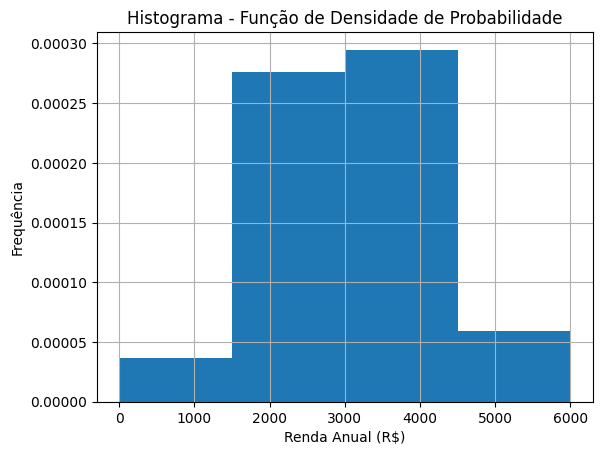

In [ ]:
#Qual é a sua função densidade de probabilidade?
intervalo = 1500
faixas_renda = np.arange(0, df['renda'].max() + intervalo, intervalo)
contagem_por_faixa, _ = np.histogram(df['renda'], bins=faixas_renda)

plt.hist(df['renda'], bins=faixas_renda, density=True)
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

###5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


In [ ]:
#Calculando a media da renda
media_renda = df['renda'].mean()
var_renda = df['renda'].var()
print(f'A média é de {media_renda:.2f} e a variância é de {var_renda:.2f}')

A média é de 3082.54 e a variância é de 993156.23


In [ ]:
#Calculando o desvio padrão
desvio_padrao = np.sqrt(var_renda)
print(f'O desvio padrão é de {desvio_padrao:.2f}')

O desvio padrão é de 996.57


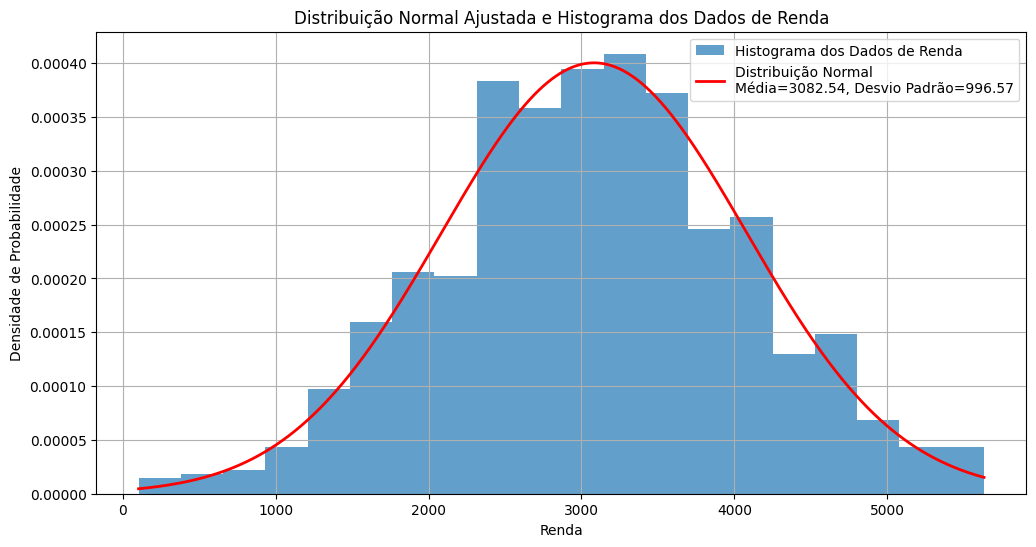

In [ ]:
x = np.linspace(df['renda'].min(), df['renda'].max(), 1000)
pdf = stats.norm.pdf(x, loc=media_renda, scale=desvio_padrao)
plt.figure(figsize=(12, 6))
plt.hist(df['renda'], bins=20, density=True, alpha=0.7, label='Histograma dos Dados de Renda')
plt.plot(x, pdf, 'r-', lw=2, label=f'Distribuição Normal\nMédia={media_renda:.2f}, Desvio Padrão={desvio_padrao:.2f}')

plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal Ajustada e Histograma dos Dados de Renda')
plt.legend()
plt.grid(True)
plt.show()

###6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
pos_graduados = len(df[df['escolaridade'] == 'Pós-graduação'])
total_pessoas = len(df)
probabilidade_pos = pos_graduados / total_pessoas
p = probabilidade_pos
n = 1000000
k = 243000
mu = n * p  # Média
sigma = np.sqrt(n * p * (1 - p))  # Desvio padrão

# Usar a fórmula de densidade normal e calcular uma faixa em torno de k
k_low = k - 0.5
k_high = k + 0.5

probabilidade_normal = stats.norm.cdf(k_high, mu, sigma) - stats.norm.cdf(k_low, mu, sigma)

print(f'A probabilidade aproximada de encontrar exatamente {k} pessoas com pós-graduação usando a distribuição normal é de {probabilidade_normal:.10f}')

A probabilidade aproximada de encontrar exatamente 243000 pessoas com pós-graduação usando a distribuição normal é de 0.0000000000


### 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
frequencias = df['escolaridade'].value_counts().sort_index()
frequencia_acumulada = frequencias.cumsum()
cdf = frequencia_acumulada / total_pessoas
cdf_df = pd.DataFrame({
    'Frequência': frequencias,
    'Frequência Acumulada': frequencia_acumulada,
    'Densidade Acumulada Discreta': cdf
})

print(cdf_df)

               Frequência  Frequência Acumulada  Densidade Acumulada Discreta
escolaridade                                                                 
Fundamental           266                   266                         0.266
Médio                 238                   504                         0.504
Pós-graduação         253                   757                         0.757
Superior              243                  1000                         1.000


In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo,faixa_renda
0,0,MA,56,Fundamental,Intermediário,4006.29,F,3000-4500
1,1,BA,46,Superior,Básico,2423.11,M,1500-3000
2,2,AM,32,Fundamental,Intermediário,3835.69,M,3000-4500
3,3,CE,60,Superior,Básico,1870.29,M,1500-3000
4,4,SE,25,Fundamental,Avançado,3529.80,M,3000-4500


###8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


In [ ]:
n = total_pessoas
p = (df['nível de proficiência em inglês'] == 'Intermediário').mean()
confidence_level = 0.95
z = stats.norm.ppf((1 + confidence_level) / 2)

margem_erro = z * np.sqrt((p * (1 - p)) / n)

print(f'A proporção de pessoas com nível de inglês intermediário é {p:.2%}')
print(f'A margem de erro amostral para um nível de confiança de {confidence_level*100}% é {margem_erro:.2%}')

A proporção de pessoas com nível de inglês intermediário é 32.90%
A margem de erro amostral para um nível de confiança de 95.0% é 2.91%


###9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
renda_total = df['renda'].sum()
renda_total

3082537.18

In [ ]:
renda_mais = media_renda + 1000
p_superior = 1 - stats.norm.cdf(renda_mais, loc=media_renda, scale=desvio_padrao)

print(f'A proporção de pessoas com renda superior a {renda_mais:.2f} é {p_superior:.4f}')

A proporção de pessoas com renda superior a 4082.54 é 0.1578


In [ ]:
n = total_pessoas
k = 60
probabilidade_mil = stats.binom.pmf(k, n, p_superior)

print(f'A probabilidade de encontrar exatamente 60 pessoas com renda superior a {renda_mais:.2f} é {probabilidade_mil:.10f}')


A probabilidade de encontrar exatamente 60 pessoas com renda superior a 4082.54 é 0.0000000000


###10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
df_filtro = df[
    (df['estado'].isin(['ES', 'MG', 'RJ', 'SP'])) &
    (df['sexo'] == 'M') &
    (df['escolaridade'] == 'Fundamental') &
    (df['renda'] > 2000)
]
pessoas_filtradas = len(df_filtro)
prob_sudeste_homem = pessoas_filtradas / total_pessoas
print(f'A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de {prob_sudeste_homem:.2%}')

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de 1.90%
